<font size="4" face="Arial"><i>Цей проект створений для перевірки і підтвердження точності онлайн калькулятора Евана Міллера в частині розрахунку необхідного розміру вибірок для контрольної та тестової груп при проведенні А/Б тестувань.<br><br> Проект застосовує метод Монте-Карло для генерації біноміальних розподілів, що імітують реальні сценарії тестування, де відома поточна конверсія, мінімально виявний ефект (MDE), рівень значущості (alpha) та бажана статистична потужність. Використовуючи ці дані, проект розраховує розмір вибірки, потім проводить статистичні тести для оцінки виявлення різниці між контрольною та тестовою групами.<br><br> Основною метою проекту є перевірка, чи реальна статистична потужність, що спостерігається в результаті тестів, відповідає заздалегідь заданій потужності. Також проект має на меті визначити, чи реальна ймовірність помилки першого роду відповідає заявленому показнику alpha.<br><br> Для забезпечення надійності та точності отриманих результатів, цей проект також включає контрольну перевірку розміру вибірки, розраховану за допомогою методу NormalIndPower з бібліотеки statsmodels. Це дозволить порівняти визначені таким чином оптимальні розміри вибірок з тими, що були розраховані за допомогою онлайн калькулятора Евана Міллера.<br><br> Проведення цієї контрольної перевірки не тільки підсилить довіру до зроблених висновків але й підкреслить важливість ретельного вибору методів статистичного аналізу при плануванні досліджень.<br><br> Результати цього проекту допоможуть розробникам та аналітикам, які планують та проводять А/Б тести, забезпечуючи їм інструмент для більш точного та надійного планування їх досліджень.</i></font>

<font size="4" face="Arial" color='red'><i>Увага!</i></font><br>
<font size="2" face="Arial"><i>Цей проект використовує модуль random для генерації випадкових даних, які імітують можливі сценарії А/Б тестування. Важливо зазначити, що через природу випадковості кожен запуск коду може призводити до легких коливань в розрахованих показниках, таких як статистична потужність або ймовірність помилки першого роду. Тому, результати, зазначені в аналізі або висновках цього проекту, слід розглядати як орієнтовні та не варто покладатися на них як на точні значення в умовах реального використання.<br>Рекомендуємо здійснювати кілька запусків аналізу та розглядати середні показники або розподіли для встановлення більш точних оцінок параметрів. Такий підхід забезпечує краще розуміння можливих варіацій та допомагає уникнути помилкових висновків на основі одноразових результатів.</i></font>

In [1]:
import numpy as np
import pandas as pd

from tqdm import tqdm
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize
from statsmodels.stats.proportion import proportions_ztest

<font size="4" face="Arial"><i>Уявімо, що необхідно провести А/Б тестування змін у дизайні сторінки авторизації в застосунку.</i></font><br><br>
<i>Поточна конверсія в реєстрацію в застосунку складає 12%.  
Гіпотеза: зміна необхідної контактної інформації при реєстрації в застосунку (замість номеру телефону необхідно внести email) підвищить конверсію в реєстрацію на 20%.  
Вважаємо, що компанія хоче провести тест з потужністю 85%. Рівень статистичної значущості втановлено на рівні 0.05.</i>


<font size="4" face="Arial"><i>Визначаємо змінні, з заданими параметрами статистичного тесту:</i></font>

In [2]:
baseline = 0.12
mde = 0.024
power = 0.85
alpha = 0.05

# Онлайн калькулятор Евана Міллєра

<font size="4" face="Arial"><i>Розраховуємо розмір вибірок за допомогою <a href="https://www.evanmiller.org/ab-testing/" target="_blank">Онлайн калькулятор Евана Міллєра</a></i></font>  

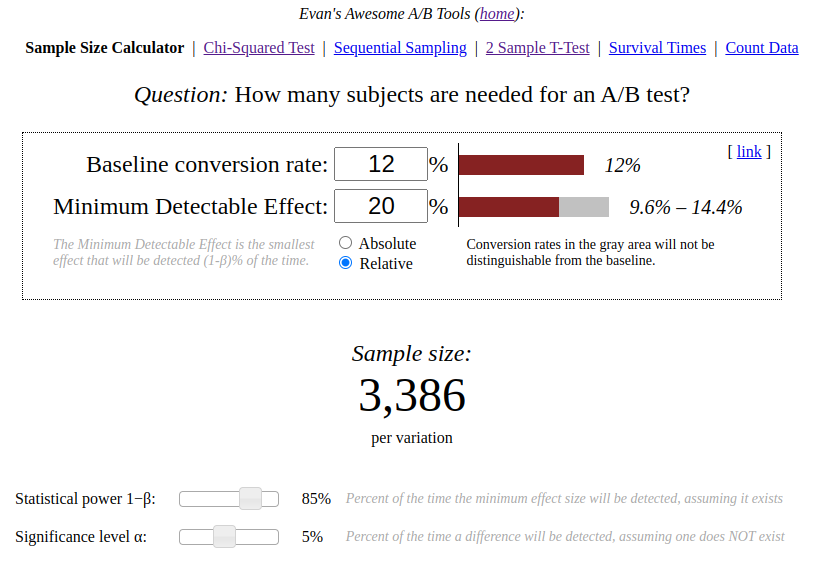

In [3]:
evan_sample_size = 3386

## Потужність тесту

<font size="4" face="Arial"><i>Створення біноміальних розподілів, які імітують результати проведеного експерименту і надають значення кількісті успішних підписок в застосунку в кожній групі.</i></font><br>
<i>Важливо зауважити, що ми створюємо наші розподіли такими, що ЗАВІДОМО МАЮТЬ РІЗНИЦЮ в значеннях конверсії. Тобто розподіл тестової групи має відсоток успіхів більший на значення mde.</i>

In [4]:
group_a = np.random.binomial(1, baseline, evan_sample_size)
group_b = np.random.binomial(1, baseline + mde, evan_sample_size)

In [5]:
group_a.mean(), group_b.mean()

(0.11961015948021264, 0.1373301831069108)

<i>Для зручності наступних розрахунків, модифікуємо код таким чином, щоб генерувати не сам розподіл, а одне число, яке є загальною кількістю успіхів у заданій кількості спроб (evan_sample_size) в одному експерименті.</i>

In [6]:
group_a = np.random.binomial(evan_sample_size, baseline)
group_b = np.random.binomial(evan_sample_size, baseline + mde)

In [7]:
group_a, group_b

(427, 507)

<i>Тестуємо результати експерименту</i>

In [8]:
z_stat, pval = proportions_ztest([group_a, group_b], [evan_sample_size, evan_sample_size], alternative='two-sided')
print(pval)
print(pval < alpha)

0.00481268710444653
True


<i>Отже, за результатами тесту, отримане значення p-value менше за визначений показник alpha, тобто можемо вважати різницю між групами статистично значущою.</i>

<font size="4" face="Arial"><i>Тепер проведемо певну кількість експериментів, щоб зафіксувати долю випадків, коли тест визначає, що різниця між групами є. </i></font><br>

<font size="4" face="Arial"><i>Створюємо функцію для проведення proportional z-test і визначення чи є отриманий результат меншим за значення alpha.</i></font>

In [9]:
def z_test_apply(success_a, success_b, n_control, n_treat, alpha):
    """
    Проводить z-тест для порівняння двох пропорцій.

    Функція використовує z-тест для визначення, чи існує статистично значуща різниця
    між двома незалежними пропорціями успіхів у двох групах.

    Параметри:
        success_a (int): Кількість успіхів у контрольній групі.
        success_b (int): Кількість успіхів у тестовій групі.
        n_control (int): Загальна кількість спостережень у контрольній групі.
        n_treat (int): Загальна кількість спостережень у тестовій групі.
        alpha (float): Рівень значущості для тесту (наприклад, 0.05).

    Повертає:
        bool: Чи є p-значення менше за alpha, що свідчить про статистичну значущість різниці між групами.

    """
    z_stat, pval = proportions_ztest([success_a, success_b], [n_control, n_treat], alternative='two-sided')
    return pval < alpha


<font size="4" face="Arial"><i>Створюємо функцію для оцінки статистичної потужності.</i></font>

In [10]:
def statistical_power_check(baseline, mde, alpha, sample_size, n_exp):
    """
    Оцінює статистичну потужність для А/Б тесту з заданими параметрами.

    Функція виконує симуляцію Монте-Карло, щоб оцінити, як часто статистичний тест виявляє
    зазначений мінімально виявний ефект (MDE) при заданому рівні значущості (alpha) та
    розмірі вибірки для контрольної та тестової груп.

    Параметри:
        baseline (float): Базова конверсія в контрольній групі.
        mde (float): Мінімально виявний ефект, зміна в конверсії, яку ми сподіваємось виявити.
        alpha (float): Рівень статистичної значущості для проведення тесту.
        sample_size (int): Розмір вибірки для кожної групи.
        n_exp (int): Кількість експериментів для проведення симуляції.

    Повертає:
        float: Оцінка статистичної потужності тесту, визначена як доля тестів,
        які виявили статистично значущу різницю.

    """
    result = []
    for _ in range(n_exp):
        group_a = np.random.binomial(sample_size, baseline)
        group_b = np.random.binomial(sample_size, baseline + mde)
        result.append((group_a, group_b))
    df = pd.DataFrame(data=result, columns=['group_a', 'group_b'])
    df['test_result'] = df.apply(lambda row: z_test_apply(row['group_a'], row['group_b'], sample_size, sample_size, alpha), axis=1)
    return df['test_result'].mean()


<i>Визначаємо кількість експериментів і запускаємо перевірку.</i>

In [11]:
n_exp = 10000

In [12]:
statistical_power_check(baseline, mde, alpha, evan_sample_size, n_exp)

0.8308

<font size="4" face="Arial"><i>Відповідно до отриманого результату, в середньому реальна потужність тесту складає 83%, що не відповідає значенню 85%, яке ми використовували при розрахунку в оплайн калькуляторі.<br>
Таким чином, можемо зробити висновок, що розмір тестової та контрольної груп, розрахований за допомогою онлайн калькулятора Евана Міллєра не є достатнім.</i></font>

<i>Давайте проведемо додаткове дослідження запустивши нашу функцію деяку кількість разів і порахуємо у скольки випадках отримане середнє значення реальної потужності тесту менше за 85%</i>

In [13]:
n = 100
powers_res = []
for _ in tqdm(range(n)):
    res = (statistical_power_check(baseline, mde, alpha, evan_sample_size, n_exp)).round(2)
    powers_res.append(res)
powers = pd.Series(powers_res)
(powers < 0.85).mean()

100%|█████████████████████████████████████████| 100/100 [01:38<00:00,  1.01it/s]


1.0

<font size="4" face="Arial"><i>В 100 випадках із 100 середній показник реальної потужності тесту менше за розрахунковий.</i></font>

## Вирогідність помилки І роду

<font size="4" face="Arial"><i>Для перевірки реальної вирогідності помилки І роду ми так само створюємо розподіли, які імітують результати експерименту для тестової та контрольної груп.</i><br><br>
<i>Єдина відмінність від попередніх розрахунків полягає в тому, що ми створюємо розподіли з однаковим показником вирогідності успішних випадків. Іншими словами, обидва розподіли матимуть коєфіціент конверсії рівний нашій базовій конверсії.</i></font>

<font size="4" face="Arial"><i>Створюємо функцію для оцінки вирогідності помилки І роду.</i></font>

In [14]:
def false_positive_rate_check(baseline, mde, alpha, sample_size, n_exp):
    """
    Оцінює вирогідність помилки І роду (false positive rate) для А/Б тесту з заданими параметрами.

    Функція виконує симуляцію Монте-Карло, щоб оцінити, як часто статистичний тест виявляє
    зазначений мінімально виявний ефект (MDE) за умови, що різниці між тестовою та контрольною групами немає.

    Параметри:
        baseline (float): Базова конверсія в контрольній групі.
        mde (float): Мінімально виявний ефект, зміна в конверсії, яку ми сподіваємось виявити.
        alpha (float): Рівень статистичної значущості для проведення тесту.
        sample_size (int): Розмір вибірки для кожної групи.
        n_exp (int): Кількість експериментів для проведення симуляції.

    Повертає:
        float: Оцінка вирогідності помилки І роду
        
    """
    result = []
    for _ in range(n_exp):
        group_a = np.random.binomial(sample_size, baseline)
        group_b = np.random.binomial(sample_size, baseline)
        result.append((group_a, group_b))
    df = pd.DataFrame(data=result, columns=['group_a', 'group_b'])
    df['test_result'] = df.apply(lambda row: z_test_apply(row['group_a'], row['group_b'], sample_size, sample_size, alpha), axis=1)
    return df['test_result'].mean()

In [15]:
false_positive_rate_check(baseline, mde, alpha, evan_sample_size, n_exp)

0.0517

<font size="4" face="Arial"><i>Відповідно до отриманого результату, в середньому реальна вирогідність отримати помилку І роду складає 0.0517, що дуже близько до визначеного параметру alpha.<br></font>

<i>Знову проведемо додаткове дослідження на деякій кількості експериментів і визначимо у скількох випадках середнє значення вирогідності помилки І роду може перевищувати встановлене значення alpha.</i>

In [16]:
n = 100
fpr_res = []
for _ in tqdm(range(n)):
    res = (false_positive_rate_check(baseline, mde, alpha, evan_sample_size, n_exp)).round(2)
    fpr_res.append(res)
false_positive_rates= pd.Series(fpr_res)
(false_positive_rates > 0.05).mean()

100%|█████████████████████████████████████████| 100/100 [01:38<00:00,  1.01it/s]


0.0

<font size="4" face="Arial"><i>В 0 випадках із 100 середній показник вирогідності отримати помилку І роду більший за визначений показник статистичної значущості, що є ідеальним показником.</i></font>

<font size="4" face="Arial"><i>Тепер нам необхідно провести контрольні тести альтернативного інструменту визначення розміру контрольної та тестової груп для проведення А/Б тестування.</i></font>

# NormalIndPower

<font size="4" face="Arial"><i><a href="https://www.statsmodels.org/dev/generated/statsmodels.stats.power.NormalIndPower.html" target="_blank">NormalIndPower()</a> є класом у бібліотеці statsmodels і часто використовується для планування експериментів та А/Б тестувань, де вам потрібно визначити необхідний розмір вибірки для того, щоб ваш тест мав достатню потужність для виявлення певного мінімально виявного ефекту (MDE).</i></font>


<i>Раніше ми вже визначили всі необхідні для розрахунку змінні окрім показника, який вказує співвідношення між розміром тестової і контрольної групи.</i>

In [17]:
ratio = 1

<i>Розраховуємо розмір вибірок</i>

In [18]:
analysis = NormalIndPower()

effect_size = proportion_effectsize(baseline, baseline + mde)

result = analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=ratio, alternative='two-sided')
python_sample_size = int(np.ceil(result))

python_sample_size

3566

<i>Розрахований розмір вибірок дещо більший, ніж той, який розрахований за допомогою онлайн калькулятора.</i>

## Потужність тесту

In [19]:
statistical_power_check(baseline, mde, alpha, python_sample_size, n_exp)

0.8489

<font size="4" face="Arial"><i>Відповідно до отриманого результату, в середньому реальна потужність тесту складає 85%, що відповідає значенню, яке ми використовували при розрахунку.<br>
Таким чином, можемо зробити висновок, що розмір тестової та контрольної груп, розрахований за допомогою NormalIndPower є достатнім.</i></font>

In [20]:
n = 100
powers_res = []
for _ in tqdm(range(n)):
    res = (statistical_power_check(baseline, mde, alpha, python_sample_size, n_exp)).round(2)
    powers_res.append(res)
powers = pd.Series(powers_res)
(powers < 0.85).mean()

100%|█████████████████████████████████████████| 100/100 [01:39<00:00,  1.01it/s]


0.08

<font size="4" face="Arial"><i>В 8 випадках із 100 середній показник реальної потужності тесту менше за розрахунковий, що є дуже високим показником.</i></font>

## Вирогідність помилки І роду

In [21]:
false_positive_rate_check(baseline, mde, alpha, python_sample_size, n_exp)

0.0474

<font size="4" face="Arial"><i>Відповідно до отриманого результату, в середньому реальна вирогідність отримати помилку І роду складає 0.0474, що навіть менше визначеного параметру alpha.<br></font>

In [22]:
n = 100
fpr_res = []
for _ in tqdm(range(n)):
    res = (false_positive_rate_check(baseline, mde, alpha, python_sample_size, n_exp)).round(2)
    fpr_res.append(res)
false_positive_rates= pd.Series(fpr_res)
(false_positive_rates > 0.05).mean()

100%|█████████████████████████████████████████| 100/100 [01:40<00:00,  1.00s/it]


0.01

<font size="4" face="Arial"><i>В 1 випадку із 100 середній показник вирогідності отримати помилку І роду більший за визначений показник статистичної значущості.</i></font>

# Висновок:

<font size="4" face="Arial"><i>Онлайн калькулятор розмірів вибірок для проведення А/Б тестування безумовно є зручним інструментом, однак цей проект демонструє, що розрахунки розмірів груп не відповідають заданим параметрам тесту, що може стати фатальною помилкою при проведенні тесту.<br><br> В свою чергу, NormalIndPower() демонструє високу точність розрахунків і я точно можу радити використання данного інструменту.</i></font>